In [342]:
import yfinance as yf 
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
from datetime import datetime
import pytz

import quandl

import seaborn as sns


In [277]:
def port_eval(port):
    
    port = pd.DataFrame(port)
    port_ret = calc_port_ret(port)
    vol = np.log(port_ret).std()*np.sqrt(252)
    
    Roll_Max = port.cummax()
    Daily_Drawdown = port/Roll_Max - 1.0
    Max_Daily_Drawdown = Daily_Drawdown.cummin()
    Max_Daily_Drawdown = Max_Daily_Drawdown.tail(1)
    
    neg_ret = port_ret[port_ret<1].dropna()
    sortino = np.log(neg_ret).std()*np.sqrt(252)
    
    cagr = port_ret.cumprod().tail(1)**(252/len(port_ret)) - 1
    
    MAR = cagr/Max_Daily_Drawdown
    
    metrics = pd.DataFrame({'': [float(cagr.iloc[0]), float(vol.iloc[0]), float(sortino.iloc[0]),
                                   float(Max_Daily_Drawdown.iloc[0])]},
                   index=['CAGR', 'Volatility', 'Sortino', 'Mad DD'])
    
    metrics = round(metrics*100, 2)
    metrics = metrics.astype(str) + '%'
    
    return metrics 

In [262]:
def calc_port_ret(port):
    port_ret = port/port.shift(1)
    port_ret = port_ret.fillna(1)
    
    return port_ret

# Backtesting Portfolio

TODO:
- 

In [285]:
asset_1_tmp = yf.download("^GSPC")
#asset_2_tmp = yf.download("^VIX")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [301]:
asset_2_tmp = quandl.get("LBMA/GOLD", authtoken="6rNSyTM5R4g7_B7XSyQW")

In [311]:
asset_1 = asset_1_tmp['Close']
#asset_2 = asset_2_tmp["Close"]

In [312]:
asset_2 = asset_2_tmp["USD (AM)"]

In [313]:
assets = pd.concat([asset_1, asset_2], axis = 1)
assets.columns = ['Asset_1', 'Asset_2']
assets = assets.ffill()
assets = assets/assets.shift(1)
assets = assets.dropna()

In [376]:
range(assets.shape[1])

2

In [370]:
initial = 1
rebalance_freq = 120
tol = 0.01

port = []

w_1 = 0.7
w_2 = 1-w_1

asset_1 = initial * w_1
asset_2 = initial * w_2

port_w1=[]
port_w2=[]

for i in range(len(assets)):
    port.append(initial)
    port_w1.append(asset_1/initial)
    port_w2.append(asset_2/initial)
    
    asset_1 = asset_1 * assets['Asset_1'].iloc[i]
    asset_2 = asset_2 * assets['Asset_2'].iloc[i]
    initial = asset_1 + asset_2
    
    
    
    
    #if i%rebalance_freq == 0: 
    #    asset_1 = initial * w_1
    #    asset_2 = initial * w_2
        
    

    if abs(port_w1[i]- w_1) > tol:
        asset_1 = initial * w_1
        asset_2 = initial * w_2
    
    elif abs(port_w2[i]- w_2) > tol:
        asset_1 = initial * w_1
        asset_2 = initial * w_2

        
        
port = pd.DataFrame(port)
port.index = assets.index

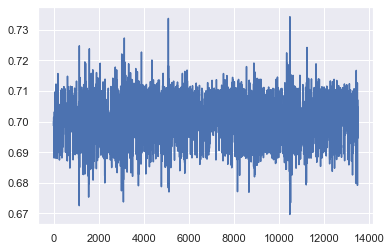

In [371]:
plt.plot(port_w1)

In [372]:
port_ret = calc_port_ret(port)

,
CAGR,7.76%
Volatility,13.15%
Sortino,10.04%
Mad DD,-39.18%


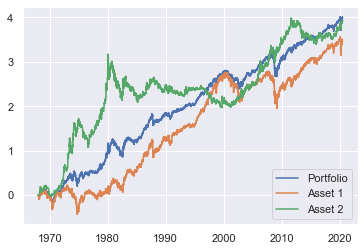

In [373]:
#sns.set()
sns.set_style("darkgrid")
plt.plot(np.log(port), label = "Portfolio");
plt.plot(np.log(assets['Asset_1'].cumprod()), label = "Asset 1");
plt.plot(np.log(assets['Asset_2'].cumprod()), label = "Asset 2");

plt.legend();

port_eval(port)

In [374]:
print("Asset 1: "+str(port_eval(assets['Asset_1'].cumprod())))
print("Asset 2: "+str(port_eval(assets['Asset_2'].cumprod())))

Asset 1:                    
CAGR          6.76%
Volatility   16.88%
Sortino      13.68%
Mad DD      -56.78%
Asset 2:                   
CAGR         7.62%
Volatility  19.62%
Sortino     15.06%
Mad DD      -70.0%


In [377]:
W = [0.4, 0.3, ]

In [378]:
sum(W)

0.7

In [380]:
W[0]

0.4